In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import missingno as msno
%matplotlib inline

In [2]:
data = pd.read_csv('galaxias_1.csv', 
                   sep=',')

In [3]:
clase=[]
for i in range(0,data.shape[0]):
    if data.elliptical[i]==1:
        clase.append('E')
    elif data.spiral[i]==1:
        clase.append('S')
    elif data.uncertain[i]==1:
        clase.append('I')
data['clase']=clase

In [4]:
data = data.drop_duplicates(subset='objID') #dropeo duplicados utilizando como referencia el id
data.shape #miro con cuantos datos me queda el dataframe

(57681, 15)

In [5]:
data = data.set_index('objID')
data

,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
objID,,,,,,,,,,,,,,
"1,23765119242489E+018",116.519097,39.886407,17.76235,16.72601,16.33972,16.06614,15.90478,8.393773,0.041521,-1.422625,0,1,0,S
"1,23765149575578E+018",116.451900,41.421270,18.12179,16.26214,15.39272,14.97515,14.65105,9.674847,0.040211,-2.729061,0,0,1,I
"1,23767370611537E+018",115.946713,41.918877,18.57293,17.42053,17.01788,16.75617,16.70899,11.277470,0.024386,-1.555044,0,0,1,I
"1,2376737066523E+018",116.051943,42.287231,21.37438,19.77335,19.55791,20.35405,18.88184,1.539542,0.039137,-1.816479,0,0,1,I
"1,23765127349266E+018",117.287392,43.434782,19.18845,17.99682,17.51119,17.26241,17.09056,12.471450,0.042591,-1.677259,0,0,1,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,23766556715083E+018",231.130092,18.628772,18.31966,16.61474,15.80569,15.41106,15.11063,9.954793,0.029269,-2.513965,1,0,0,E
"1,23765495320163E+018",245.132716,49.797424,18.05554,17.05332,16.70874,16.50322,16.34947,9.012850,0.040825,-1.346800,0,0,1,I
"1,23765494945271E+018",245.038742,50.552353,19.65135,17.74399,16.86763,16.43538,16.09720,3.514471,0.048618,-2.783718,0,0,1,I


In [6]:
data.loc[(data.modelMag_u >24), 'modelMag_u'] = np.nan 
data.loc[(data.modelMag_g >24), 'modelMag_g'] = np.nan 
data.loc[(data.modelMag_r >24), 'modelMag_r'] = np.nan 
data.loc[(data.modelMag_i >24), 'modelMag_i'] = np.nan 
data.loc[(data.Color >24), 'Color'] = np.nan 
data.loc[(data.modelMag_z >24), 'modelMag_z'] = np.nan 
#data.loc[(data.petroR90_r >70000), 'petroR90_r'] = np.nan 
data.loc[(data.petroR90_r <0), 'petroR90_r'] = np.nan 
data.loc[(data.petroR90_r >30), 'petroR90_r'] = np.nan 

In [7]:
data.loc[(data.modelMag_u <0), 'modelMag_u'] = np.nan 
data.loc[(data.modelMag_g <0), 'modelMag_g'] = np.nan 
data.loc[(data.modelMag_r <0), 'modelMag_r'] = np.nan 
data.loc[(data.modelMag_i <0), 'modelMag_i'] = np.nan 
data.loc[(data.Color <-100), 'Color'] = np.nan 
data.loc[(data.modelMag_z <0), 'modelMag_z'] = np.nan 
data.loc[(data.petroR90_r >70000), 'petroR90_r'] = np.nan 

In [8]:
relevant_columns =['ra','dec','modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','petroR90_r','Color','z']
data=data.dropna(subset=relevant_columns, thresh=2)

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

In [10]:
relevant_columns =['ra','dec','modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','petroR90_r','Color','z']
#relevant_columns
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
data[relevant_columns] = scaler.fit_transform(data[relevant_columns])

In [11]:
columns_to_use =['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z','petroR90_r','Color','z']


In [12]:
data_imputada =data.copy(deep=True)

In [13]:
imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
data_imputada[columns_to_use] = imputer.fit_transform(
    data_imputada[columns_to_use]
)

C:\Users\joaqu\AppData\Roaming\Python\Python310\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [14]:
df1 = data_imputada.copy()
df1 = df1.reset_index()
cols = ['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z',
       'Color']
Q1 = df1.quantile(0.25,numeric_only=True)
Q3 = df1.quantile(0.75,numeric_only=True)
IQR = Q3 - Q1

df1 = df1[~((df1[cols] < (Q1 - 2.5 * IQR)) |(df1[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()
df1

C:\Users\joaqu\AppData\Local\Temp\ipykernel_1788\3168546568.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1[cols] < (Q1 - 2.5 * IQR)) |(df1[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()
C:\Users\joaqu\AppData\Local\Temp\ipykernel_1788\3168546568.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1[cols] < (Q1 - 2.5 * IQR)) |(df1[cols] > (Q3 + 2.5 * IQR))).any(axis=1)].copy()


,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
0,"1,23765119242489E+018",0.323679,0.628123,0.338990,0.392003,0.436968,0.386463,0.375031,0.259110,0.717351,0.513242,0,1,0,S
1,"1,23765149575578E+018",0.323492,0.646994,0.377313,0.346088,0.343713,0.294927,0.276037,0.303067,0.673681,0.456580,0,0,1,I
2,"1,23767370611537E+018",0.322089,0.653112,0.425411,0.460749,0.503749,0.444357,0.438531,0.358057,0.146169,0.507498,0,0,1,I
3,"1,2376737066523E+018",0.322381,0.657641,0.724091,0.693638,0.753877,0.746224,0.610099,0.023926,0.637896,0.496160,0,0,1,I
4,"1,23765127349266E+018",0.325813,0.671750,0.491036,0.517792,0.552328,0.486832,0.468660,0.399025,0.753031,0.502198,0,0,1,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57676,"1,23766556715083E+018",0.642081,0.366766,0.398409,0.380989,0.384380,0.331501,0.312325,0.312672,0.308971,0.465909,1,0,0,E
57677,"1,23765495320163E+018",0.680982,0.749977,0.370249,0.424401,0.473307,0.423135,0.410144,0.280352,0.694151,0.516530,0,0,1,I
57678,"1,23765494945271E+018",0.680721,0.759258,0.540388,0.492766,0.488954,0.417443,0.390224,0.091690,0.953935,0.454209,0,0,1,I
57679,"1,23765153764514E+018",0.609253,0.904167,0.447429,0.490282,0.536688,0.476909,0.464959,0.142169,0.562806,0.513048,0,0,1,I


In [15]:
from sklearn.decomposition import PCA

In [16]:
features = ['ra','dec','modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z','Color','elliptical','spiral','uncertain']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
df1[features]=scaler.fit_transform(df1[features])
#df_scaled = scaler.fit_transform(df1[features])
pca = PCA(n_components=3)
df_to_pca=df1[features].copy() 
pca_features = pca.fit_transform(df_to_pca)
 
print('Shape before PCA: ', df_to_pca.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

Shape before PCA:  (56904, 13)
Shape after PCA:  (56904, 3)


In [18]:
target_names = {
    0:'S',
    1:'I', 
    2:'E'
}
 
pca_df['target'] = df1['clase']

 
pca_df

,PC1,PC2,PC3,target
0,0.851642,-0.244538,0.150064,S
1,-0.485227,0.132725,0.019279,I
2,-0.537859,0.011625,-0.382607,I
3,-0.717590,-0.533431,0.316101,I
4,-0.560275,-0.169741,0.157587,I
...,...,...,...,...
56899,0.265480,1.006375,0.245217,E
56900,-0.542484,-0.065908,0.066442,S
56901,-0.590180,-0.177854,0.413413,S
56902,-0.594465,-0.165025,0.047411,E


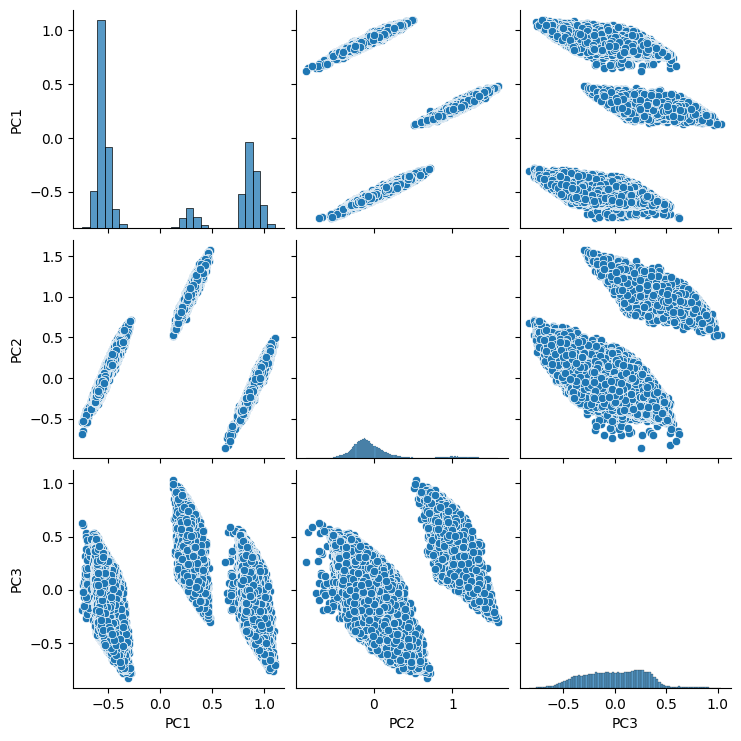

In [19]:
sns.pairplot(data=pca_df)

In [20]:
df1

,objID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,clase
0,"1,23765119242489E+018",0.323679,0.628123,0.389169,0.422592,0.454803,0.424855,0.437167,0.311275,0.717351,0.649162,0.0,1.0,0.0,S
1,"1,23765149575578E+018",0.323492,0.646994,0.439584,0.359343,0.334233,0.300361,0.293730,0.366994,0.673681,0.377718,0.0,0.0,1.0,I
2,"1,23767370611537E+018",0.322089,0.653112,0.502861,0.517290,0.541145,0.503596,0.529175,0.436699,0.146169,0.621648,0.0,0.0,1.0,I
3,"1,2376737066523E+018",0.322381,0.657641,0.895791,0.838099,0.864537,0.914154,0.777765,0.013158,0.637896,0.567329,0.0,0.0,1.0,I
4,"1,23765127349266E+018",0.325813,0.671750,0.589193,0.595867,0.603953,0.561363,0.572829,0.488630,0.753031,0.596255,0.0,0.0,1.0,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57676,"1,23766556715083E+018",0.642081,0.366766,0.467337,0.407420,0.386812,0.350103,0.346310,0.379170,0.308971,0.422410,1.0,0.0,0.0,E
57677,"1,23765495320163E+018",0.680982,0.749977,0.430292,0.467221,0.501786,0.474731,0.488043,0.338202,0.694151,0.664916,0.0,0.0,1.0,I
57678,"1,23765494945271E+018",0.680721,0.759258,0.654119,0.561394,0.522016,0.466990,0.459181,0.099056,0.953935,0.366362,0.0,0.0,1.0,I
57679,"1,23765153764514E+018",0.609253,0.904167,0.531826,0.557973,0.583732,0.547867,0.567467,0.163042,0.562806,0.648237,0.0,0.0,1.0,I


In [21]:
new_df1 = df1.drop(['clase'],axis=1)
new_df1 = new_df1.drop(['objID'],axis=1)
new_df1 = df1[['modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i', 'modelMag_z', 'petroR90_r', 'z','Color','elliptical','spiral','uncertain']]

In [22]:
new_df =pd.DataFrame(scaler.fit_transform(new_df1), columns = new_df1.columns)
new_df

,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain
0,0.389169,0.422592,0.454803,0.424855,0.437167,0.311275,0.717351,0.649162,0.0,1.0,0.0
1,0.439584,0.359343,0.334233,0.300361,0.293730,0.366994,0.673681,0.377718,0.0,0.0,1.0
2,0.502861,0.517290,0.541145,0.503596,0.529175,0.436699,0.146169,0.621648,0.0,0.0,1.0
3,0.895791,0.838099,0.864537,0.914154,0.777765,0.013158,0.637896,0.567329,0.0,0.0,1.0
4,0.589193,0.595867,0.603953,0.561363,0.572829,0.488630,0.753031,0.596255,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
56899,0.467337,0.407420,0.386812,0.350103,0.346310,0.379170,0.308971,0.422410,1.0,0.0,0.0
56900,0.430292,0.467221,0.501786,0.474731,0.488043,0.338202,0.694151,0.664916,0.0,0.0,1.0
56901,0.654119,0.561394,0.522016,0.466990,0.459181,0.099056,0.953935,0.366362,0.0,0.0,1.0
56902,0.531826,0.557973,0.583732,0.547867,0.567467,0.163042,0.562806,0.648237,0.0,0.0,1.0


In [23]:
from sklearn.feature_extraction import DictVectorizer

feature_cols = new_df.columns.values 
feature_dict =list(new_df[feature_cols].T.to_dict().values())

vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)


In [24]:
#evaluo la dimension final de la matriz para no generar un conflicto en la memoria
matrix_size_mb = feature_matrix.shape[0]*feature_matrix.shape[1]*4/1024/1024
print("the dense matrix wil weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 10
precision_type = np.float32
if matrix_size_mb < limit_size_mb: #Matrix less than 10mb
    dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
    #we calculate how many rows would fit given the number of columns
    n_rows = int(limit_size_mb*1024*1024/4/feature_matrix.shape[1])
    print("Matrix too big! Using only first {} of {} rows".format(
        n_rows, feature_matrix.shape[0]))
    dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()
    
#print("Final size: {2.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

the dense matrix wil weight approximately 2.39 MB


In [25]:
#se aplica algoritmo de analisis de componentes principales
scaled_dense_feature_matrix = np.asarray(dense_feature_matrix)
pca = PCA(n_components=3)
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape

(56904, 3)

In [26]:
pca.explained_variance_ratio_

array([0.60928035, 0.16180344, 0.11701117], dtype=float32)

In [27]:
pca.explained_variance_ratio_.sum()

0.88809496

In [28]:
pca.n_components

3

In [29]:
pcas=[]
for i in range(1,4):
    pcas.append("Pca_"+str(i))
new_df1[pcas] = proyected_features[:,:3]



C:\Users\joaqu\AppData\Local\Temp\ipykernel_1788\2069734072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1[pcas] = proyected_features[:,:3]
C:\Users\joaqu\AppData\Local\Temp\ipykernel_1788\2069734072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1[pcas] = proyected_features[:,:3]
C:\Users\joaqu\AppData\Local\Temp\ipykernel_1788\2069734072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

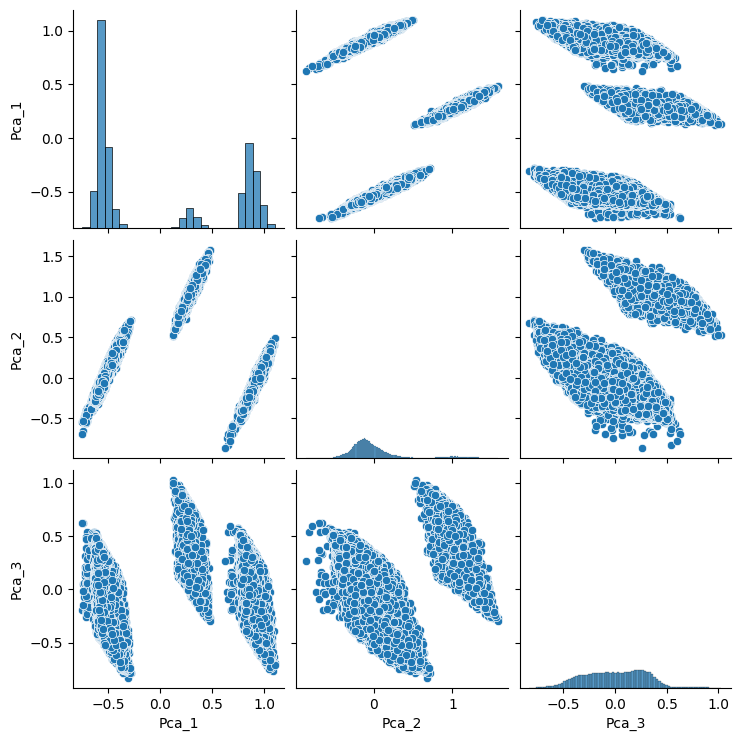

In [30]:
sns.pairplot(data=new_df1,
                x_vars=['Pca_1','Pca_2','Pca_3'],
                y_vars=['Pca_1','Pca_2','Pca_3'])

In [31]:
new_df1

,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,Pca_1,Pca_2,Pca_3
0,0.389169,0.422592,0.454803,0.424855,0.437167,0.311275,0.717351,0.649162,0.0,1.0,0.0,0.852198,-0.243057,0.142953
1,0.439584,0.359343,0.334233,0.300361,0.293730,0.366994,0.673681,0.377718,0.0,0.0,1.0,-0.484619,0.134264,0.011404
2,0.502861,0.517290,0.541145,0.503596,0.529175,0.436699,0.146169,0.621648,0.0,0.0,1.0,-0.537235,0.013047,-0.390114
3,0.895791,0.838099,0.864537,0.914154,0.777765,0.013158,0.637896,0.567329,0.0,0.0,1.0,-0.716951,-0.531891,0.309541
4,0.589193,0.595867,0.603953,0.561363,0.572829,0.488630,0.753031,0.596255,0.0,0.0,1.0,-0.559587,-0.168111,0.149890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57676,0.467337,0.407420,0.386812,0.350103,0.346310,0.379170,0.308971,0.422410,1.0,0.0,0.0,0.265227,1.005560,0.249907
57677,0.430292,0.467221,0.501786,0.474731,0.488043,0.338202,0.694151,0.664916,0.0,0.0,1.0,-0.541493,-0.065264,0.065236
57678,0.654119,0.561394,0.522016,0.466990,0.459181,0.099056,0.953935,0.366362,0.0,0.0,1.0,-0.589159,-0.177107,0.412313
57679,0.531826,0.557973,0.583732,0.547867,0.567467,0.163042,0.562806,0.648237,0.0,0.0,1.0,-0.592988,-0.163510,0.042379


In [32]:
new_df1['clase'] = df1['clase']

In [33]:
new_df1

,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,Pca_1,Pca_2,Pca_3,clase
0,0.389169,0.422592,0.454803,0.424855,0.437167,0.311275,0.717351,0.649162,0.0,1.0,0.0,0.852198,-0.243057,0.142953,S
1,0.439584,0.359343,0.334233,0.300361,0.293730,0.366994,0.673681,0.377718,0.0,0.0,1.0,-0.484619,0.134264,0.011404,I
2,0.502861,0.517290,0.541145,0.503596,0.529175,0.436699,0.146169,0.621648,0.0,0.0,1.0,-0.537235,0.013047,-0.390114,I
3,0.895791,0.838099,0.864537,0.914154,0.777765,0.013158,0.637896,0.567329,0.0,0.0,1.0,-0.716951,-0.531891,0.309541,I
4,0.589193,0.595867,0.603953,0.561363,0.572829,0.488630,0.753031,0.596255,0.0,0.0,1.0,-0.559587,-0.168111,0.149890,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57676,0.467337,0.407420,0.386812,0.350103,0.346310,0.379170,0.308971,0.422410,1.0,0.0,0.0,0.265227,1.005560,0.249907,E
57677,0.430292,0.467221,0.501786,0.474731,0.488043,0.338202,0.694151,0.664916,0.0,0.0,1.0,-0.541493,-0.065264,0.065236,I
57678,0.654119,0.561394,0.522016,0.466990,0.459181,0.099056,0.953935,0.366362,0.0,0.0,1.0,-0.589159,-0.177107,0.412313,I
57679,0.531826,0.557973,0.583732,0.547867,0.567467,0.163042,0.562806,0.648237,0.0,0.0,1.0,-0.592988,-0.163510,0.042379,I


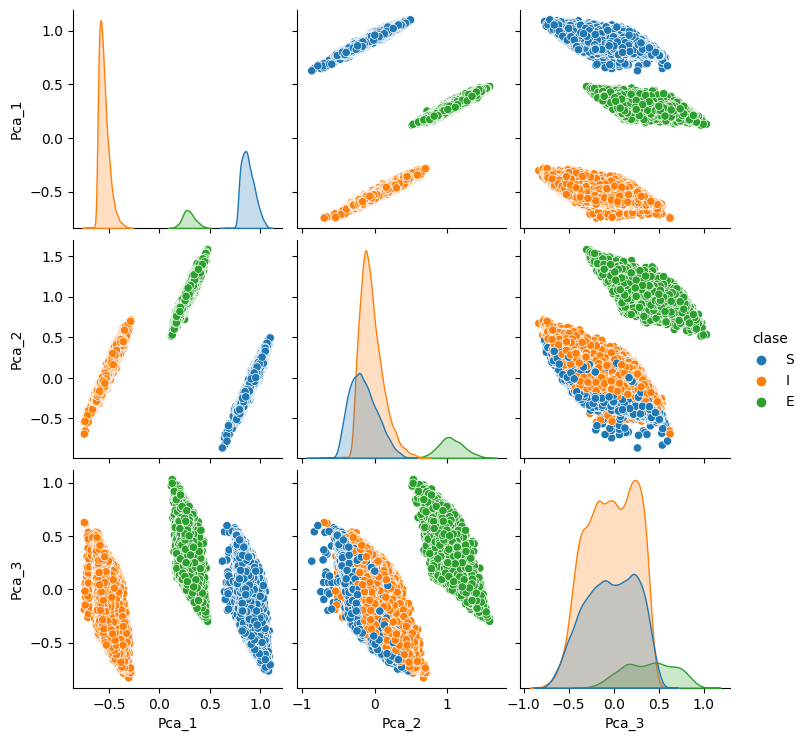

In [34]:
sns.pairplot(data=new_df1,
                x_vars=['Pca_1','Pca_2','Pca_3'],
                y_vars=['Pca_1','Pca_2','Pca_3'],hue='clase')

In [35]:
scaled_dense_feature_matrix

array([[0.6491616 , 0.        , 0.4225917 , ..., 1.        , 0.        ,
        0.7173514 ],
       [0.37771833, 0.        , 0.3593427 , ..., 0.        , 1.        ,
        0.67368126],
       [0.6216484 , 0.        , 0.51728994, ..., 0.        , 1.        ,
        0.1461686 ],
       ...,
       [0.36636204, 0.        , 0.5613939 , ..., 0.        , 1.        ,
        0.95393455],
       [0.64823675, 0.        , 0.5579729 , ..., 0.        , 1.        ,
        0.5628062 ],
       [0.50185096, 0.        , 0.50644463, ..., 1.        , 0.        ,
        0.4714803 ]], dtype=float32)

In [36]:
dfdf=pd.DataFrame(data=scaled_dense_feature_matrix)

In [37]:
dfdf

,0,1,2,3,4,5,6,7,8,9,10
0,0.649162,0.0,0.422592,0.424855,0.454803,0.389169,0.437167,0.311276,1.0,0.0,0.717351
1,0.377718,0.0,0.359343,0.300361,0.334233,0.439584,0.293730,0.366994,0.0,1.0,0.673681
2,0.621648,0.0,0.517290,0.503596,0.541145,0.502861,0.529175,0.436699,0.0,1.0,0.146169
3,0.567329,0.0,0.838099,0.914154,0.864537,0.895791,0.777765,0.013158,0.0,1.0,0.637896
4,0.596255,0.0,0.595867,0.561363,0.603953,0.589193,0.572829,0.488630,0.0,1.0,0.753031
...,...,...,...,...,...,...,...,...,...,...,...
56899,0.422410,1.0,0.407420,0.350103,0.386812,0.467337,0.346310,0.379170,0.0,0.0,0.308971
56900,0.664916,0.0,0.467221,0.474731,0.501786,0.430292,0.488043,0.338202,0.0,1.0,0.694151
56901,0.366362,0.0,0.561394,0.466990,0.522016,0.654119,0.459181,0.099056,0.0,1.0,0.953935
56902,0.648237,0.0,0.557973,0.547867,0.583732,0.531826,0.567467,0.163042,0.0,1.0,0.562806


In [38]:
new_df1

,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,petroR90_r,z,Color,elliptical,spiral,uncertain,Pca_1,Pca_2,Pca_3,clase
0,0.389169,0.422592,0.454803,0.424855,0.437167,0.311275,0.717351,0.649162,0.0,1.0,0.0,0.852198,-0.243057,0.142953,S
1,0.439584,0.359343,0.334233,0.300361,0.293730,0.366994,0.673681,0.377718,0.0,0.0,1.0,-0.484619,0.134264,0.011404,I
2,0.502861,0.517290,0.541145,0.503596,0.529175,0.436699,0.146169,0.621648,0.0,0.0,1.0,-0.537235,0.013047,-0.390114,I
3,0.895791,0.838099,0.864537,0.914154,0.777765,0.013158,0.637896,0.567329,0.0,0.0,1.0,-0.716951,-0.531891,0.309541,I
4,0.589193,0.595867,0.603953,0.561363,0.572829,0.488630,0.753031,0.596255,0.0,0.0,1.0,-0.559587,-0.168111,0.149890,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57676,0.467337,0.407420,0.386812,0.350103,0.346310,0.379170,0.308971,0.422410,1.0,0.0,0.0,0.265227,1.005560,0.249907,E
57677,0.430292,0.467221,0.501786,0.474731,0.488043,0.338202,0.694151,0.664916,0.0,0.0,1.0,-0.541493,-0.065264,0.065236,I
57678,0.654119,0.561394,0.522016,0.466990,0.459181,0.099056,0.953935,0.366362,0.0,0.0,1.0,-0.589159,-0.177107,0.412313,I
57679,0.531826,0.557973,0.583732,0.547867,0.567467,0.163042,0.562806,0.648237,0.0,0.0,1.0,-0.592988,-0.163510,0.042379,I
